In [39]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from random import seed
from random import random

from numpy.random import rand

In [40]:
vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
vis_data.info()

In [ ]:
vis_data.state.describe()

In [ ]:
vis_data.state.fillna('MI')

In [ ]:
vis_data.state.mode()

In [ ]:
vis_data.balance_due

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
new_data = scaler.fit_transform(vis_data[['balance_due', 'clean_up_cost']])

In [ ]:
new_data.reshape(1,-1)[0].min()

In [ ]:
np.log(vis_data.balance_due[vis_data.balance_due > 0]).hist()

In [ ]:
np.sqrt(vis_data.balance_due[vis_data.balance_due > 0]).hist()

In [ ]:
import seaborn as sns

corr = vis_data.drop(['violation_zip_code', 'payment_amount', 
                      'clean_up_cost', 
                      'violation_street_number'], axis=1).\
                dropna(axis=1).\
                corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [ ]:
a = np.sqrt(vis_data.balance_due[vis_data.balance_due > 0]).median()
b = np.sqrt(vis_data.balance_due[vis_data.balance_due > 0]).mean()
print(a-b)

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

vis_data = pd.read_csv("./data/train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data = vis_data.drop(['violation_zip_code', 'clean_up_cost'], axis=1)
latlons = pd.read_csv("./data/latlons.csv")
vis_data = pd.concat([vis_data, latlons], axis=1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(2)
poly_features = pf.fit_transform(vis_data[['balance_due', 'payment_amount']])
poly_features
poly_features.shape

In [ ]:
pd.get_dummies(vis_data.state).shape

In [ ]:
datetime_vals = pd.to_datetime(vis_data.payment_date.dropna())
datetime_vals.head()

In [ ]:
datetime_vals[1].month

Загрузите данные train.csv, найдите признак, обозначающий баланс и признак, обозначающий размер платежа (payment_amount). Создайте полиномиальные признаки степени 3. Посчитайте среднее значение для каждого получившегося признака. В качестве ответа укажите индекс признака, который содержит максимальное среднее значение.

In [ ]:
pf = PolynomialFeatures(3)
poly_features = pf.fit_transform(vis_data[['balance_due', 'payment_amount']])
df_poly = pd.DataFrame(poly_features)
df_poly.mean().argmax()


In [ ]:
vis_data[['balance_due', 'payment_amount']]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
a = np.array([[2,3],[4,5],[6,7]])
#a = a[:,np.newaxis]
poly = PolynomialFeatures(degree=3)
a_poly = poly.fit_transform(a)
print(a_poly)
df = pd.DataFrame(a_poly)

In [ ]:
df.mean().argmax()

Загрузите данные train.csv, найдите признак, обозначающий дату, когда был выписан штраф. Найдите, сколько раз штраф был выписан на выходных, и запишите это число в качестве ответа.

In [41]:
datetime_vals = pd.to_datetime(vis_data['ticket_issued_date'])

NameError: name 'vis_data' is not defined

In [ ]:
datetime_vals[datetime_vals.dt.weekday >=5]

In [ ]:
a=[1,2,3,4,5]
b = np.array(a)
np.sum(b)

In [ ]:
np.sum(vis_data.fine_amount == 0)

Загрузите данные train.csv, найдите признак, обозначающий баланс. Уберите пропуски из этого признака и найдите выбросы с помощью межквартильного расстояния. Найдите модуль разницы между минимальным и максимальным среди значений, которые остались после удаления выбросов.


In [ ]:
np.sum(vis_data.balance_due >= 0)

In [ ]:
no_na_data = vis_data.balance_due.dropna()

In [ ]:
vis_data_filterred = vis_data.balance_due[vis_data.balance_due > 0]

In [ ]:
vis_data_filterred.describe()

In [ ]:
vis_data_filterred.hist(bins=100)

In [ ]:
sns.boxplot(data = vis_data_filterred)

In [ ]:
sns.boxplot(data = no_na_data)

In [ ]:
quartile_1,quartile_3 = np.percentile(vis_data_filterred, [25, 75])
quartile_1,quartile_3
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
quartile_1,quartile_3

In [ ]:
quartile_1,quartile_3 = np.percentile(no_na_data, [25, 75])
quartile_1,quartile_3
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
quartile_1,quartile_3

In [ ]:
lower_bound, upper_bound

In [ ]:
x = np.array(no_na_data)

In [ ]:
y = np.where((x<lower_bound)|(x>upper_bound),1,0)
vis_data_filterred[y==1]

In [ ]:
vis_data_filterred[y==1].hist()

In [ ]:
z = np.where((lower_bound<=x)&(x<=upper_bound),1,0)
z2 = no_na_data[z==1]
z2.describe()

In [ ]:
z2.hist()

In [ ]:
z2.max()-z2.min()

In [ ]:
np.sum(y)

In [42]:
y = [math.sin(x/100) for x in range(314)]

In [43]:
xx = [x for x in range(314)]

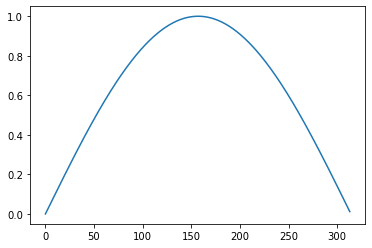

In [44]:
plt.plot(xx, y)

In [45]:
rand(30)

array([0.01430473, 0.66304015, 0.898889  , 0.72356619, 0.33129488,
       0.54452575, 0.71162899, 0.87683938, 0.78946304, 0.65440129,
       0.02842128, 0.94574022, 0.09845213, 0.20567075, 0.00588987,
       0.27448269, 0.83284289, 0.62369145, 0.06464579, 0.90987289,
       0.54642054, 0.64922697, 0.48451674, 0.8856765 , 0.06898904,
       0.12386859, 0.30284383, 0.21699537, 0.96362355, 0.54034194])

In [46]:
random.uniform(-10,10)

AttributeError: 'builtin_function_or_method' object has no attribute 'uniform'